In [1]:
%run talktools.py

## Pandas: versatile tool for data wrangling in Python

* emphasis on tabular data (csv and the like)
* database/spreadsheet-like functionality
* rich support for mixed data (numpy is for homogeneous arrays)
* integrates cleanly with numpy and matplotlib
* really shines with time-series data

<img src="http://akamaicovers.oreilly.com/images/0636920023784/lrg.jpg" width="30%">

  - Definative Book: http://shop.oreilly.com/product/0636920023784.do#
  - Quick Ref: http://pandas.pydata.org/pandas-docs/stable/10min.html
  

In [2]:
import numpy as np
import pandas as pd  ## this is by convention
pd.options.display.width = 1000

In [3]:
s = pd.Series([-1, 20, -30, 40, -50])
s

0    -1
1    20
2   -30
3    40
4   -50
dtype: int64

In [4]:
s.index

RangeIndex(start=0, stop=5, step=1)

In [5]:
s.index[2]

2

In [6]:
s.values

array([ -1,  20, -30,  40, -50])

In [9]:
s2 = pd.Series([1, 2, np.nan, 4, 5],
              index=['one', 'two', 'three', 'four', 'five'])
s2

one      1.0
two      2.0
three    NaN
four     4.0
five     5.0
dtype: float64

In [10]:
s2.index[0]

'one'

In [11]:
s2

one      1.0
two      2.0
three    NaN
four     4.0
five     5.0
dtype: float64

In [12]:
s2['three']

nan

In [13]:
s2[2]

nan

In [14]:
s2[['one', 'three', 'two']]

one      1.0
three    NaN
two      2.0
dtype: float64

In [15]:
s2

one      1.0
two      2.0
three    NaN
four     4.0
five     5.0
dtype: float64

In [16]:
s3 = s2[:3]

In [17]:
s2

one      1.0
two      2.0
three    NaN
four     4.0
five     5.0
dtype: float64

In [18]:
s3

one      1.0
two      2.0
three    NaN
dtype: float64

In [19]:
s3.to_dict()

{'one': 1.0, 'three': nan, 'two': 2.0}

In [20]:
pd.Series(s3.to_dict())

one      1.0
three    NaN
two      2.0
dtype: float64

In [21]:
df = pd.DataFrame({'A': s2, 'B': s3})
df

,A,B
five,5.0,NaN
four,4.0,NaN
one,1.0,1.0
three,NaN,NaN
two,2.0,2.0


In [22]:
df['A']

five     5.0
four     4.0
one      1.0
three    NaN
two      2.0
Name: A, dtype: float64

In [23]:
df['B']

five     NaN
four     NaN
one      1.0
three    NaN
two      2.0
Name: B, dtype: float64

### Boolean indexing

In [33]:
type(df[df["A"] > 0])

pandas.core.frame.DataFrame

**Note** While many of the NumPy access methods work on DataFrames, use the pandas-specific data access methods, `.at`, `.iat`, `.loc`, `.iloc` and `.ix`.

See the [Indexing section](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and below.

In [34]:
df.ix['four']

A    4.0
B    NaN
Name: four, dtype: float64

Select via the position of the passed integers ... looks like NumPy indexing.

In [35]:
df.iloc[1:3, :]

,A,B
four,4.0,NaN
one,1.0,1.0


In [36]:
df.columns

Index(['A', 'B'], dtype='object')

In [28]:
df.index

Index(['five', 'four', 'one', 'three', 'two'], dtype='object')

In [29]:
df.values

array([[  5.,  nan],
       [  4.,  nan],
       [  1.,   1.],
       [ nan,  nan],
       [  2.,   2.]])

In [30]:
df

,A,B
five,5.0,NaN
four,4.0,NaN
one,1.0,1.0
three,NaN,NaN
two,2.0,2.0


In [31]:
df.values

array([[  5.,  nan],
       [  4.,  nan],
       [  1.,   1.],
       [ nan,  nan],
       [  2.,   2.]])

In [32]:
df.sort_index(ascending=True)

,A,B
five,5.0,NaN
four,4.0,NaN
one,1.0,1.0
three,NaN,NaN
two,2.0,2.0


In [37]:
df2 = pd.DataFrame(df.values, columns=['A', 'B'])

In [38]:
df2['A'] = 7.5
df2

,A,B
0,7.5,NaN
1,7.5,NaN
2,7.5,1.0
3,7.5,NaN
4,7.5,2.0


In [39]:
df2.dropna?

In [40]:
df3 = df2.dropna()
df3

,A,B
2,7.5,1.0
4,7.5,2.0


In [41]:
del df3["A"]
df3

,B
2,1.0
4,2.0


## Reading in Data, Time Series

In [43]:
!head -n 10 multiTimeline.csv

Week,ice cream,Volleyball,tennis
2011-09-03,25,18,83
2011-09-10,21,18,58
2011-09-17,20,18,25
2011-09-24,21,18,24
2011-10-01,20,18,24
2011-10-08,20,18,23
2011-10-15,27,19,22
2011-10-22,21,21,21
2011-10-29,19,22,20


In [44]:
fred = pd.read_csv('multiTimeline.csv')
fred

,Week,ice cream,Volleyball,tennis
0,2011-09-03,25,18,83
1,2011-09-10,21,18,58
2,2011-09-17,20,18,25
3,2011-09-24,21,18,24
4,2011-10-01,20,18,24
5,2011-10-08,20,18,23
6,2011-10-15,27,19,22
7,2011-10-22,21,21,21
8,2011-10-29,19,22,20
9,2011-11-05,19,22,21


In [45]:
fred.head(10)

,Week,ice cream,Volleyball,tennis
0,2011-09-03,25,18,83
1,2011-09-10,21,18,58
2,2011-09-17,20,18,25
3,2011-09-24,21,18,24
4,2011-10-01,20,18,24
5,2011-10-08,20,18,23
6,2011-10-15,27,19,22
7,2011-10-22,21,21,21
8,2011-10-29,19,22,20
9,2011-11-05,19,22,21


In [46]:
fred['ice cream']

0      25
1      21
2      20
3      21
4      20
5      20
6      27
7      21
8      19
9      19
10     21
11     22
12     19
13     19
14     21
15     24
16     23
17     21
18     22
19     22
20     22
21     22
22     23
23     22
24     22
25     23
26     23
27     26
28     27
29     26
       ..
231    19
232    21
233    22
234    22
235    25
236    27
237    27
238    25
239    26
240    28
241    31
242    29
243    29
244    31
245    32
246    36
247    40
248    38
249    39
250    42
251    43
252    44
253    44
254    53
255    43
256    41
257    36
258    36
259    34
260    33
Name: ice cream, dtype: int64

In [47]:
fred["ice cream"].index[:10]

RangeIndex(start=0, stop=10, step=1)

In [48]:
fred["Week"][:5]

0    2011-09-03
1    2011-09-10
2    2011-09-17
3    2011-09-24
4    2011-10-01
Name: Week, dtype: object

In [49]:
fred.Week[0]

'2011-09-03'

In [50]:
# Several ways to convert to date
from datetime import datetime
import dateutil.parser as parser

print(parser.parse(fred.Week[0]))

2011-09-03 00:00:00


In [51]:
datetime.strptime(fred.Week[0], '%Y-%m-%d')

datetime.datetime(2011, 9, 3, 0, 0)

In [52]:
dates = [datetime.strptime(x, '%Y-%m-%d') for x in fred.Week]
dates

[datetime.datetime(2011, 9, 3, 0, 0),
 datetime.datetime(2011, 9, 10, 0, 0),
 datetime.datetime(2011, 9, 17, 0, 0),
 datetime.datetime(2011, 9, 24, 0, 0),
 datetime.datetime(2011, 10, 1, 0, 0),
 datetime.datetime(2011, 10, 8, 0, 0),
 datetime.datetime(2011, 10, 15, 0, 0),
 datetime.datetime(2011, 10, 22, 0, 0),
 datetime.datetime(2011, 10, 29, 0, 0),
 datetime.datetime(2011, 11, 5, 0, 0),
 datetime.datetime(2011, 11, 12, 0, 0),
 datetime.datetime(2011, 11, 19, 0, 0),
 datetime.datetime(2011, 11, 26, 0, 0),
 datetime.datetime(2011, 12, 3, 0, 0),
 datetime.datetime(2011, 12, 10, 0, 0),
 datetime.datetime(2011, 12, 17, 0, 0),
 datetime.datetime(2011, 12, 24, 0, 0),
 datetime.datetime(2011, 12, 31, 0, 0),
 datetime.datetime(2012, 1, 7, 0, 0),
 datetime.datetime(2012, 1, 14, 0, 0),
 datetime.datetime(2012, 1, 21, 0, 0),
 datetime.datetime(2012, 1, 28, 0, 0),
 datetime.datetime(2012, 2, 4, 0, 0),
 datetime.datetime(2012, 2, 11, 0, 0),
 datetime.datetime(2012, 2, 18, 0, 0),
 datetime.datetime

In [53]:
pd.DatetimeIndex(dates)

DatetimeIndex(['2011-09-03', '2011-09-10', '2011-09-17', '2011-09-24', '2011-10-01', '2011-10-08', '2011-10-15', '2011-10-22', '2011-10-29', '2011-11-05',
               ...
               '2016-06-25', '2016-07-02', '2016-07-09', '2016-07-16', '2016-07-23', '2016-07-30', '2016-08-06', '2016-08-13', '2016-08-20', '2016-08-27'], dtype='datetime64[ns]', length=261, freq=None)

In [54]:
# Series in, Series out
pd.to_datetime(fred.Week)

0     2011-09-03
1     2011-09-10
2     2011-09-17
3     2011-09-24
4     2011-10-01
5     2011-10-08
6     2011-10-15
7     2011-10-22
8     2011-10-29
9     2011-11-05
10    2011-11-12
11    2011-11-19
12    2011-11-26
13    2011-12-03
14    2011-12-10
15    2011-12-17
16    2011-12-24
17    2011-12-31
18    2012-01-07
19    2012-01-14
20    2012-01-21
21    2012-01-28
22    2012-02-04
23    2012-02-11
24    2012-02-18
25    2012-02-25
26    2012-03-03
27    2012-03-10
28    2012-03-17
29    2012-03-24
         ...    
231   2016-02-06
232   2016-02-13
233   2016-02-20
234   2016-02-27
235   2016-03-05
236   2016-03-12
237   2016-03-19
238   2016-03-26
239   2016-04-02
240   2016-04-09
241   2016-04-16
242   2016-04-23
243   2016-04-30
244   2016-05-07
245   2016-05-14
246   2016-05-21
247   2016-05-28
248   2016-06-04
249   2016-06-11
250   2016-06-18
251   2016-06-25
252   2016-07-02
253   2016-07-09
254   2016-07-16
255   2016-07-23
256   2016-07-30
257   2016-08-06
258   2016-08-

In [55]:
# NumPy array in, DatetimeIndex out
pd.to_datetime(fred.Week.values)

DatetimeIndex(['2011-09-03', '2011-09-10', '2011-09-17', '2011-09-24', '2011-10-01', '2011-10-08', '2011-10-15', '2011-10-22', '2011-10-29', '2011-11-05',
               ...
               '2016-06-25', '2016-07-02', '2016-07-09', '2016-07-16', '2016-07-23', '2016-07-30', '2016-08-06', '2016-08-13', '2016-08-20', '2016-08-27'], dtype='datetime64[ns]', length=261, freq=None)

In [56]:
pd.to_datetime(fred.Week, format='%Y-%m-%d')

0     2011-09-03
1     2011-09-10
2     2011-09-17
3     2011-09-24
4     2011-10-01
5     2011-10-08
6     2011-10-15
7     2011-10-22
8     2011-10-29
9     2011-11-05
10    2011-11-12
11    2011-11-19
12    2011-11-26
13    2011-12-03
14    2011-12-10
15    2011-12-17
16    2011-12-24
17    2011-12-31
18    2012-01-07
19    2012-01-14
20    2012-01-21
21    2012-01-28
22    2012-02-04
23    2012-02-11
24    2012-02-18
25    2012-02-25
26    2012-03-03
27    2012-03-10
28    2012-03-17
29    2012-03-24
         ...    
231   2016-02-06
232   2016-02-13
233   2016-02-20
234   2016-02-27
235   2016-03-05
236   2016-03-12
237   2016-03-19
238   2016-03-26
239   2016-04-02
240   2016-04-09
241   2016-04-16
242   2016-04-23
243   2016-04-30
244   2016-05-07
245   2016-05-14
246   2016-05-21
247   2016-05-28
248   2016-06-04
249   2016-06-11
250   2016-06-18
251   2016-06-25
252   2016-07-02
253   2016-07-09
254   2016-07-16
255   2016-07-23
256   2016-07-30
257   2016-08-06
258   2016-08-

In [57]:
pd.to_datetime(['96/21/05'], format='%y/%d/%m')

DatetimeIndex(['1996-05-21'], dtype='datetime64[ns]', freq=None)

In [58]:
fred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 4 columns):
Week          261 non-null object
ice cream     261 non-null int64
Volleyball    261 non-null int64
tennis        261 non-null int64
dtypes: int64(3), object(1)
memory usage: 8.2+ KB


In [59]:
print(fred.to_string())

           Week  ice cream  Volleyball  tennis
0    2011-09-03         25          18      83
1    2011-09-10         21          18      58
2    2011-09-17         20          18      25
3    2011-09-24         21          18      24
4    2011-10-01         20          18      24
5    2011-10-08         20          18      23
6    2011-10-15         27          19      22
7    2011-10-22         21          21      21
8    2011-10-29         19          22      20
9    2011-11-05         19          22      21
10   2011-11-12         21          20      20
11   2011-11-19         22          15      22
12   2011-11-26         19          14      21
13   2011-12-03         19          12      19
14   2011-12-10         21          11      19
15   2011-12-17         24           8      18
16   2011-12-24         23           7      19
17   2011-12-31         21          10      21
18   2012-01-07         22          12      22
19   2012-01-14         22          11      28
20   2012-01-

In [60]:
from IPython.display import HTML
HTML(fred.to_html())

,Week,ice cream,Volleyball,tennis
0,2011-09-03,25,18,83
1,2011-09-10,21,18,58
2,2011-09-17,20,18,25
3,2011-09-24,21,18,24
4,2011-10-01,20,18,24
5,2011-10-08,20,18,23
6,2011-10-15,27,19,22
7,2011-10-22,21,21,21
8,2011-10-29,19,22,20
9,2011-11-05,19,22,21


In [61]:
fred['Week'] = pd.to_datetime(fred['Week'])
fred.dtypes

Week          datetime64[ns]
ice cream              int64
Volleyball             int64
tennis                 int64
dtype: object

In [62]:
fred.index[:50]

RangeIndex(start=0, stop=50, step=1)

In [63]:
# Returns new object without inplace=True!
fred.set_index('Week', inplace=True)

In [64]:
fred.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2011-09-03 to 2016-08-27
Data columns (total 3 columns):
ice cream     261 non-null int64
Volleyball    261 non-null int64
tennis        261 non-null int64
dtypes: int64(3)
memory usage: 8.2 KB


In [65]:
fred.head()

,ice cream,Volleyball,tennis
Week,,,
2011-09-03,25,18,83
2011-09-10,21,18,58
2011-09-17,20,18,25
2011-09-24,21,18,24
2011-10-01,20,18,24


In [66]:
fred["ice cream"]

Week
2011-09-03    25
2011-09-10    21
2011-09-17    20
2011-09-24    21
2011-10-01    20
2011-10-08    20
2011-10-15    27
2011-10-22    21
2011-10-29    19
2011-11-05    19
2011-11-12    21
2011-11-19    22
2011-11-26    19
2011-12-03    19
2011-12-10    21
2011-12-17    24
2011-12-24    23
2011-12-31    21
2012-01-07    22
2012-01-14    22
2012-01-21    22
2012-01-28    22
2012-02-04    23
2012-02-11    22
2012-02-18    22
2012-02-25    23
2012-03-03    23
2012-03-10    26
2012-03-17    27
2012-03-24    26
              ..
2016-02-06    19
2016-02-13    21
2016-02-20    22
2016-02-27    22
2016-03-05    25
2016-03-12    27
2016-03-19    27
2016-03-26    25
2016-04-02    26
2016-04-09    28
2016-04-16    31
2016-04-23    29
2016-04-30    29
2016-05-07    31
2016-05-14    32
2016-05-21    36
2016-05-28    40
2016-06-04    38
2016-06-11    39
2016-06-18    42
2016-06-25    43
2016-07-02    44
2016-07-09    44
2016-07-16    53
2016-07-23    43
2016-07-30    41
2016-08-06    36
2016-08-1

In [67]:
type(fred["ice cream"])

pandas.core.series.Series

In [68]:
fred.index

DatetimeIndex(['2011-09-03', '2011-09-10', '2011-09-17', '2011-09-24', '2011-10-01', '2011-10-08', '2011-10-15', '2011-10-22', '2011-10-29', '2011-11-05',
               ...
               '2016-06-25', '2016-07-02', '2016-07-09', '2016-07-16', '2016-07-23', '2016-07-30', '2016-08-06', '2016-08-13', '2016-08-20', '2016-08-27'], dtype='datetime64[ns]', name='Week', length=261, freq=None)

In [69]:
fred.index[5]

Timestamp('2011-10-08 00:00:00')

In [70]:
stamp = fred.index[5]
stamp

Timestamp('2011-10-08 00:00:00')

In [71]:
stamp.year, stamp.month, stamp.day

(2011, 10, 8)

In [72]:
stamp.weekday()

5

In [73]:
fred.index.year

array([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
       2011, 2011, 2011, 2011, 2011, 2011, 2011, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 20

In [74]:
fred.index.weekday

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5], dtype=int32)

In [75]:
fred.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2011-09-03 to 2016-08-27
Data columns (total 3 columns):
ice cream     261 non-null int64
Volleyball    261 non-null int64
tennis        261 non-null int64
dtypes: int64(3)
memory usage: 8.2 KB


In [76]:
%matplotlib inline
import matplotlib.pylab as plt

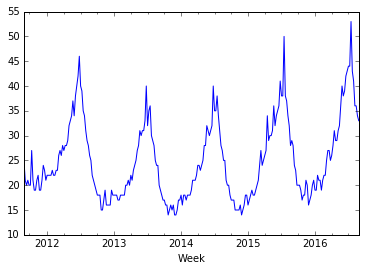

In [77]:
fred["ice cream"].plot()

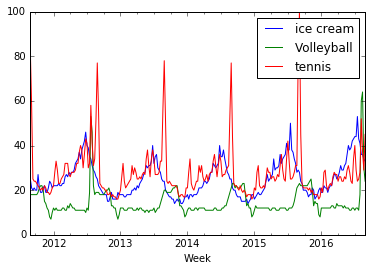

In [78]:
fred.plot()

Typically, you'll try to format your data as you read it in. Here we can do all that date and index stuff in one line.

In [79]:
fred = pd.read_csv('multiTimeline.csv',index_col=0,parse_dates=[0])
fred.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2011-09-03 to 2016-08-27
Data columns (total 3 columns):
ice cream     261 non-null int64
Volleyball    261 non-null int64
tennis        261 non-null int64
dtypes: int64(3)
memory usage: 8.2 KB


## Merging data frames

We often want to combine dataframes by index, joining columns together on the same index.

In [107]:
!head full_moon.csv

Week,full moon
2011-09-03,26
2011-09-10,50
2011-09-17,14
2011-09-24,17
2011-10-01,21
2011-10-08,55
2011-10-15,13
2011-10-22,16
2011-10-29,17


In [108]:
moon = pd.read_csv('full_moon.csv',index_col=0,parse_dates=[0])
moon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2011-09-03 to 2016-08-27
Data columns (total 1 columns):
full moon    261 non-null int64
dtypes: int64(1)
memory usage: 4.1 KB


Below, the merge `how` can be:

  * left: use only keys from left frame (SQL: left outer join)
  * right: use only keys from right frame (SQL: right outer join)
  * outer: use union of keys from both frames (SQL: full outer join)
  * inner: use intersection of keys from both frames (SQL: inner join)

In [109]:
df = fred.merge(moon,left_index=True, right_index=True, how = 'right')
df

,ice cream,Volleyball,tennis,full moon
Week,,,,
2011-09-03,25,18,83,26
2011-09-10,21,18,58,50
2011-09-17,20,18,25,14
2011-09-24,21,18,24,17
2011-10-01,20,18,24,21
2011-10-08,20,18,23,55
2011-10-15,27,19,22,13
2011-10-22,21,21,21,16
2011-10-29,19,22,20,17


Let's save that for later:

In [110]:
df.to_csv("merged_data.csv")

In [111]:
!head merged_data.csv

Week,ice cream,Volleyball,tennis,full moon
2011-09-03,25,18,83,26
2011-09-10,21,18,58,50
2011-09-17,20,18,25,14
2011-09-24,21,18,24,17
2011-10-01,20,18,24,21
2011-10-08,20,18,23,55
2011-10-15,27,19,22,13
2011-10-22,21,21,21,16
2011-10-29,19,22,20,17


In [128]:
df.to_latex

<bound method DataFrame.to_latex of             ice cream  Volleyball  tennis  full moon
Week                                                
2011-09-03         25          18      83         26
2011-09-10         21          18      58         50
2011-09-17         20          18      25         14
2011-09-24         21          18      24         17
2011-10-01         20          18      24         21
2011-10-08         20          18      23         55
2011-10-15         27          19      22         13
2011-10-22         21          21      21         16
2011-10-29         19          22      20         17
2011-11-05         19          22      21         56
2011-11-12         21          20      20         16
2011-11-19         22          15      22         12
2011-11-26         19          14      21         15
2011-12-03         19          12      19         39
2011-12-10         21          11      19         21
2011-12-17         24           8      18         12
2011-12-24

In [113]:
import io
a = io.StringIO()
df.to_latex(buf=a)
a.seek(0)
print(a.read())
a.close()

\begin{tabular}{lrrrr}
\toprule
{} &  ice cream &  Volleyball &  tennis &  full moon \\
Week       &            &             &         &            \\
\midrule
2011-09-03 &         25 &          18 &      83 &         26 \\
2011-09-10 &         21 &          18 &      58 &         50 \\
2011-09-17 &         20 &          18 &      25 &         14 \\
2011-09-24 &         21 &          18 &      24 &         17 \\
2011-10-01 &         20 &          18 &      24 &         21 \\
2011-10-08 &         20 &          18 &      23 &         55 \\
2011-10-15 &         27 &          19 &      22 &         13 \\
2011-10-22 &         21 &          21 &      21 &         16 \\
2011-10-29 &         19 &          22 &      20 &         17 \\
2011-11-05 &         19 &          22 &      21 &         56 \\
2011-11-12 &         21 &          20 &      20 &         16 \\
2011-11-19 &         22 &          15 &      22 &         12 \\
2011-11-26 &         19 &          14 &      21 &         15 \\
2011-12

In [114]:
df[["ice cream","full moon"]]['2013':'2014'].head()

,ice cream,full moon
Week,,
2013-01-05,18,14
2013-01-12,18,16
2013-01-19,18,33
2013-01-26,17,31
2013-02-02,17,14


In [115]:
df[["ice cream","full moon"]]['2013-06':'2013-09'].head()

,ice cream,full moon
Week,,
2013-06-01,30,16
2013-06-08,31,19
2013-06-15,31,45
2013-06-22,33,40
2013-06-29,40,13


In [116]:
stamp

Timestamp('2011-10-08 00:00:00')

In [117]:
df["ice cream"][stamp]

20

In [118]:
df.ix[stamp]

ice cream     20
Volleyball    18
tennis        23
full moon     55
Name: 2011-10-08 00:00:00, dtype: int64

In [119]:
years = df.index.year
years

array([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
       2011, 2011, 2011, 2011, 2011, 2011, 2011, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2012, 2012, 2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 20

### Grouping 

By “group by” we are referring to a process involving one or more of the following steps

- **Splitting** the data into groups based on some criteria
- **Applying** a function to each group independently
- **Combining** the results into a data structure

See the [Grouping docs](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby) for more.

In [120]:
annual_min = df.groupby(years).min()
annual_max = df.groupby(years).max()

Another operation to combine dataframes: `pd.concat`

<pre>
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, copy=True)

Concatenate pandas objects along a particular axis with optional set logic
along the other axes. Can also add a layer of hierarchical indexing on the
concatenation axis, which may be useful if the labels are the same (or
overlapping) on the passed axis number
</pre>

In [121]:
annual_min_and_max = pd.concat([annual_min, annual_max], 
                               axis=1, keys=['min', 'max'])
annual_min_and_max

min                                   max                            
     ice cream Volleyball tennis full moon ice cream Volleyball tennis full moon
2011        19          7     18        12        27         22     83        56
2012        15          7     16        11        46         53     77        64
2013        14          8     17        10        40         22     78        67
2014        14          8     16        12        40         23     77       100
2015        16          8     16        12        50         25    100        73
2016        19         11     19        14        53         64     52        87

### Resampling
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#up-and-downsampling

<pre>
B       business day frequency
C       custom business day frequency (experimental)
D       calendar day frequency
W       weekly frequency
M       month end frequency
BM      business month end frequency
CBM     custom business month end frequency
MS      month start frequency
BMS     business month start frequency
CBMS    custom business month start frequency
Q       quarter end frequency
BQ      business quarter endfrequency
QS      quarter start frequency
BQS     business quarter start frequency
A       year end frequency
BA      business year end frequency
AS      year start frequency
BAS     business year start frequency
BH      business hour frequency
H       hourly frequency
T       minutely frequency
S       secondly frequency
L       milliseonds
U       microseconds
N       nanoseconds
</pre>

above from: http://stackoverflow.com/questions/17001389/pandas-resample-documentation

In [122]:
df["ice cream"].resample('A-JUN').min()  # year end June

Week
2012-06-30    19
2013-06-30    15
2014-06-30    14
2015-06-30    14
2016-06-30    16
2017-06-30    33
Freq: A-JUN, Name: ice cream, dtype: int64

In [123]:
df["ice cream"].resample('A-JUN', how=['min', 'max'])

/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


,min,max
Week,,
2012-06-30,19,46
2013-06-30,15,40
2014-06-30,14,40
2015-06-30,14,41
2016-06-30,16,50
2017-06-30,33,53


In [124]:
annual_minmax = df.resample('A-JUN', how=['min', 'max'])
annual_minmax

/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


ice cream     Volleyball     tennis      full moon     
                 min max        min max    min  max       min  max
Week                                                              
2012-06-30        19  46          7  22     18   83        12   58
2013-06-30        15  40          7  53     16   77        11   64
2014-06-30        14  40          8  22     17   78        10  100
2015-06-30        14  41          8  23     16   77        12   69
2016-06-30        16  50          8  25     16  100        12   83
2017-06-30        33  53         11  64     24   52        16   87

In [125]:
annual_minmax.columns

MultiIndex(levels=[['ice cream', 'Volleyball', 'tennis', 'full moon'], ['min', 'max']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]])

In [126]:
annual_minmax['tennis', 'max']

Week
2012-06-30     83
2013-06-30     77
2014-06-30     78
2015-06-30     77
2016-06-30    100
2017-06-30     52
Freq: A-JUN, Name: (tennis, max), dtype: int64

In [127]:
annual_minmax[('ice cream', 'max')].index

DatetimeIndex(['2012-06-30', '2013-06-30', '2014-06-30', '2015-06-30', '2016-06-30', '2017-06-30'], dtype='datetime64[ns]', name='Week', freq='A-JUN')

In [101]:
# Your own aggregation function
def mad(x):
    return np.abs(x - x.mean()).mean()
fred["ice cream"].resample('A-JUN', how=mad)

/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


Week
2012-06-30    5.274793
2013-06-30    5.755178
2014-06-30    5.612426
2015-06-30    6.659763
2016-06-30    6.875740
2017-06-30    5.061728
Freq: A-JUN, Name: ice cream, dtype: float64

Shifting, correlation, date arithmetic
-------

In [102]:
df.shift(3).head(10)

,A,B
five,NaN,NaN
four,NaN,NaN
one,NaN,NaN
three,7.5,NaN
two,7.5,NaN


In [103]:
df_1diff = df - df.shift(1)
df_1diff.head(10)

,A,B
five,NaN,NaN
four,0.0,NaN
one,0.0,NaN
three,0.0,NaN
two,0.0,NaN


In [104]:
df_1diff.corr()

,A,B
A,NaN,NaN
B,NaN,NaN


In [105]:
(df - df.shift(6)).corr()

,A,B
A,NaN,NaN
B,NaN,NaN


In [106]:
def lag_corr(table, periods):
    # you may not care but...
    return (table[periods:] - table.shift(periods)).corr()

def pctchg_corr(table, periods):
    # you may not care but...
    return (table[periods:] / table.shift(periods) - 1).corr()

all_lags = [lag_corr(df, i) for i in range(1, 20)]

lags_onetable = pd.concat(all_lags, keys=range(1, 20))
lags_onetable

A   B
1  A NaN NaN
   B NaN NaN
2  A NaN NaN
   B NaN NaN
3  A NaN NaN
   B NaN NaN
4  A NaN NaN
   B NaN NaN
5  A NaN NaN
   B NaN NaN
6  A NaN NaN
   B NaN NaN
7  A NaN NaN
   B NaN NaN
8  A NaN NaN
   B NaN NaN
9  A NaN NaN
   B NaN NaN
10 A NaN NaN
   B NaN NaN
11 A NaN NaN
   B NaN NaN
12 A NaN NaN
   B NaN NaN
13 A NaN NaN
   B NaN NaN
14 A NaN NaN
   B NaN NaN
15 A NaN NaN
   B NaN NaN
16 A NaN NaN
   B NaN NaN
17 A NaN NaN
   B NaN NaN
18 A NaN NaN
   B NaN NaN
19 A NaN NaN
   B NaN NaN

In [ ]:
unstacked = lags_onetable.unstack(1)
unstacked

In [ ]:
unstacked['ice cream', 'tennis'].plot(label='IC-FM')
unstacked['full moon', 'Volleyball'].plot(label='FM-VB')
unstacked['tennis', 'Volleyball'].plot(label='FM-VB')

In [ ]:
df_1diff.info()

In [ ]:
df_1diff["ice cream"].corr(df_1diff["ice cream"].shift(1))

In [ ]:
df_1diff.shift(1).head()

In [ ]:
df_1diff.corrwith(df_1diff.shift(1))

In [ ]:
pd.DataFrame({'Lag1': df_1diff.corrwith(df_1diff.shift(1)),
     'Lag2': df_1diff.corrwith(df_1diff.shift(2))})
 

In [ ]:
lag_acorr_table = pd.DataFrame({'Lag%d' % i: 
                                df_1diff.corrwith(df_1diff.shift(i))
         for i in range(1, 7)})
lag_acorr_table

In [ ]:
lag_acorr_table.T

Date arithmetic
====

In [ ]:
df.head(10)

In [ ]:
df.shift(10, freq='H').head(10)

In [ ]:
df.shift(2, freq='M').head(10)

In [ ]:
pdf = df.to_period('M')
pdf.head(10).index

In [ ]:
pdf.index[0]

In [ ]:
pdf.index[0].asfreq('S', 'end')

In [ ]:
pdf.index[0].asfreq('S', 'start')

In [ ]:
pdf.index[0].asfreq('H', 'end') - 5

In [ ]:
# 7th business day
(pdf.index[0].asfreq('B', 'start') + 6).to_timestamp()

In [ ]:
df.head()

In [ ]:
df.shift(4, freq='D').head()

In [ ]:
df.shift(4, freq='D').resample('D').head(50)

In [ ]:
df.shift(4, freq='D').resample('D').apply(pd.Series.interpolate).head(50)

In [ ]:
df.shift(4, freq='D').resample('D', fill_method='bfill').head(50)

Time zone handling
----

In [ ]:
stamp = pd.Timestamp(datetime.now())
stamp

In [ ]:
print(stamp.tz)

In [ ]:
stamp.tz_localize('US/Pacific')

In [ ]:
stamp_pac = stamp.tz_localize('US/Pacific')
stamp_pac

In [ ]:
stamp_pac.tz_convert('Asia/Tokyo')

In [ ]:
stamp_pac.tz_convert('Asia/Tokyo').hour

In [ ]:
stamp_pac.tz_convert('Asia/Tokyo').day

In [ ]:
stamp_pac.tz_convert('Asia/Tokyo').value

In [ ]:
stamp_pac.tz_convert('Asia/Tokyo').tz_convert('utc').value

In [ ]:
df_shifted = df.shift(1, freq='4D9H30T')
df_shang = df_shifted\
    .tz_localize('US/Eastern')\
    .tz_convert('Asia/Shanghai')
df_shang

In [ ]:
df_shang.index

In [ ]:
df_shifted = df.shift(1, freq='4D9H30T')
df_shifted\
    .tz_localize('US/Eastern')\
    .tz_convert('US/Pacific').resample('A-DEC').mean()